In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Zacarias_1 = "In the eighth month, in the second year of Darius, came the word of the LORD to Zechariah, the son of Berechiah, the son of Iddo the prophet, saying,The LORD has been sore displeased with your fathers.Therefore say you to them, Thus said the LORD of hosts; Turn you to me, said the LORD of hosts, and I will turn to you, said the LORD of hosts.Be you not as your fathers, to whom the former prophets have cried, saying, Thus said the LORD of hosts; Turn you now from your evil ways, and from your evil doings: but they did not hear, nor listen to me, said the LORD.Your fathers, where are they? and the prophets, do they live for ever?But my words and my statutes, which I commanded my servants the prophets, did they not take hold of your fathers? and they returned and said, Like as the LORD of hosts thought to do to us, according to our ways, and according to our doings, so has he dealt with us.On the four and twentieth day of the eleventh month, which is the month Sebat, in the second year of Darius, came the word of the LORD to Zechariah, the son of Berechiah, the son of Iddo the prophet, saying,I saw by night, and behold a man riding on a red horse, and he stood among the myrtle trees that were in the bottom; and behind him were there red horses, speckled, and white.Then said I, O my lord, what are these? And the angel that talked with me said to me, I will show you what these be.And the man that stood among the myrtle trees answered and said, These are they whom the LORD has sent to walk to and fro through the earth.And they answered the angel of the LORD that stood among the myrtle trees, and said, We have walked to and fro through the earth, and, behold, all the earth sits still, and is at rest.Then the angel of the LORD answered and said, O LORD of hosts, how long will you not have mercy on Jerusalem and on the cities of Judah, against which you have had indignation these three score and ten years?And the LORD answered the angel that talked with me with good words and comfortable words.So the angel that communed with me said to me, Cry you, saying, Thus said the LORD of hosts; I am jealous for Jerusalem and for Zion with a great jealousy.And I am very sore displeased with the heathen that are at ease: for I was but a little displeased, and they helped forward the affliction.Therefore thus said the LORD; I am returned to Jerusalem with mercies: my house shall be built in it, said the LORD of hosts, and a line shall be stretched forth on Jerusalem.Cry yet, saying, Thus said the LORD of hosts; My cities through prosperity shall yet be spread abroad; and the LORD shall yet comfort Zion, and shall yet choose Jerusalem.Then lifted I up my eyes, and saw, and behold four horns.And I said to the angel that talked with me, What be these? And he answered me, These are the horns which have scattered Judah, Israel, and Jerusalem.And the LORD showed me four carpenters.Then said I, What come these to do? And he spoke, saying, These are the horns which have scattered Judah, so that no man did lift up his head: but these are come to fray them, to cast out the horns of the Gentiles, which lifted up their horn over the land of Judah to scatter it.".lower()

In [6]:
Zacarias_2 = "I lifted up my eyes again, and looked, and behold a man with a measuring line in his hand.Then said I, Where go you? And he said to me, To measure Jerusalem, to see what is the breadth thereof, and what is the length thereof.And, behold, the angel that talked with me went forth, and another angel went out to meet him,And said to him, Run, speak to this young man, saying, Jerusalem shall be inhabited as towns without walls for the multitude of men and cattle therein:For I, said the LORD, will be to her a wall of fire round about, and will be the glory in the middle of her.Ho, ho, come forth, and flee from the land of the north, said the LORD: for I have spread you abroad as the four winds of the heaven, said the LORD.Deliver yourself, O Zion, that dwell with the daughter of Babylon.For thus said the LORD of hosts; After the glory has he sent me to the nations which spoiled you: for he that touches you touches the apple of his eye.For, behold, I will shake my hand on them, and they shall be a spoil to their servants: and you shall know that the LORD of hosts has sent me.Sing and rejoice, O daughter of Zion: for, see, I come, and I will dwell in the middle of you, said the LORD.And many nations shall be joined to the LORD in that day, and shall be my people: and I will dwell in the middle of you, and you shall know that the LORD of hosts has sent me to you.And the LORD shall inherit Judah his portion in the holy land, and shall choose Jerusalem again.Be silent, O all flesh, before the LORD: for he is raised up out of his holy habitation.".lower()

In [7]:
Zacarias_3 = "And he showed me Joshua the high priest standing before the angel of the LORD, and Satan standing at his right hand to resist him.And the LORD said to Satan, The LORD rebuke you, O Satan; even the LORD that has chosen Jerusalem rebuke you: is not this a brand plucked out of the fire?Now Joshua was clothed with filthy garments, and stood before the angel.And he answered and spoke to those that stood before him, saying, Take away the filthy garments from him. And to him he said, Behold, I have caused your iniquity to pass from you, and I will clothe you with change of raiment.And I said, Let them set a fair turban on his head. So they set a fair turban on his head, and clothed him with garments. And the angel of the LORD stood by.And the angel of the LORD protested to Joshua, saying,Thus said the LORD of hosts; If you will walk in my ways, and if you will keep my charge, then you shall also judge my house, and shall also keep my courts, and I will give you places to walk among these that stand by.Hear now, O Joshua the high priest, you, and your fellows that sit before you: for they are men wondered at: for, behold, I will bring forth my servant the BRANCH.For behold the stone that I have laid before Joshua; on one stone shall be seven eyes: behold, I will engrave the engraving thereof, said the LORD of hosts, and I will remove the iniquity of that land in one day.In that day, said the LORD of hosts, shall you call every man his neighbor under the vine and under the fig tree.".lower()

In [8]:
Zacarias_4 = "And the angel that talked with me came again, and waked me, as a man that is wakened out of his sleep.And said to me, What see you? And I said, I have looked, and behold a candlestick all of gold, with a bowl on the top of it, and his seven lamps thereon, and seven pipes to the seven lamps, which are on the top thereof:And two olive trees by it, one on the right side of the bowl, and the other on the left side thereof.So I answered and spoke to the angel that talked with me, saying, What are these, my lord?Then the angel that talked with me answered and said to me, Know you not what these be? And I said, No, my lord.Then he answered and spoke to me, saying, This is the word of the LORD to Zerubbabel, saying, Not by might, nor by power, but by my spirit, said the LORD of hosts.Who are you, O great mountain? before Zerubbabel you shall become a plain: and he shall bring forth the headstone thereof with shoutings, crying, Grace, grace to it.Moreover the word of the LORD came to me, saying,The hands of Zerubbabel have laid the foundation of this house; his hands shall also finish it; and you shall know that the LORD of hosts has sent me to you.For who has despised the day of small things? for they shall rejoice, and shall see the plummet in the hand of Zerubbabel with those seven; they are the eyes of the LORD, which run to and fro through the whole earth.Then answered I, and said to him, What are these two olive trees on the right side of the candlestick and on the left side thereof?And I answered again, and said to him, What be these two olive branches which through the two golden pipes empty the golden oil out of themselves?And he answered me and said, Know you not what these be? And I said, No, my lord.Then said he, These are the two anointed ones, that stand by the LORD of the whole earth.".lower()

In [9]:
Zacarias_5 = "Then I turned, and lifted up my eyes, and looked, and behold a flying roll.And he said to me, What see you? And I answered, I see a flying roll; the length thereof is twenty cubits, and the breadth thereof ten cubits.Then said he to me, This is the curse that goes forth over the face of the whole earth: for every one that steals shall be cut off as on this side according to it; and every one that swears shall be cut off as on that side according to it.I will bring it forth, said the LORD of hosts, and it shall enter into the house of the thief, and into the house of him that swears falsely by my name: and it shall remain in the middle of his house, and shall consume it with the timber thereof and the stones thereof.Then the angel that talked with me went forth, and said to me, Lift up now your eyes, and see what is this that goes forth.And I said, What is it? And he said, This is an ephah that goes forth. He said moreover, This is their resemblance through all the earth.And, behold, there was lifted up a talent of lead: and this is a woman that sits in the middle of the ephah.And he said, This is wickedness. And he cast it into the middle of the ephah; and he cast the weight of lead on the mouth thereof.Then lifted I up my eyes, and looked, and, behold, there came out two women, and the wind was in their wings; for they had wings like the wings of a stork: and they lifted up the ephah between the earth and the heaven.Then said I to the angel that talked with me, Where do these bear the ephah?And he said to me, To build it an house in the land of Shinar: and it shall be established, and set there on her own base.".lower()

In [10]:
Zacarias_6 = "And I turned, and lifted up my eyes, and looked, and, behold, there came four chariots out from between two mountains; and the mountains were mountains of brass.In the first chariot were red horses; and in the second chariot black horses;And in the third chariot white horses; and in the fourth chariot spotted and bay horses.Then I answered and said to the angel that talked with me, What are these, my lord?And the angel answered and said to me, These are the four spirits of the heavens, which go forth from standing before the LORD of all the earth.The black horses which are therein go forth into the north country; and the white go forth after them; and the spotted go forth toward the south country.And the bay went forth, and sought to go that they might walk to and fro through the earth: and he said, Get you hence, walk to and fro through the earth. So they walked to and fro through the earth.Then cried he on me, and spoke to me, saying, Behold, these that go toward the north country have quieted my spirit in the north country.And the word of the LORD came to me, saying,Take of them of the captivity, even of Heldai, of Tobijah, and of Jedaiah, which are come from Babylon, and come you the same day, and go into the house of Josiah the son of Zephaniah;Then take silver and gold, and make crowns, and set them on the head of Joshua the son of Josedech, the high priest;And speak to him, saying, Thus speaks the LORD of hosts, saying, Behold the man whose name is The BRANCH; and he shall grow up out of his place, and he shall build the temple of the LORD:Even he shall build the temple of the LORD; and he shall bear the glory, and shall sit and rule on his throne; and he shall be a priest on his throne: and the counsel of peace shall be between them both.And the crowns shall be to Helem, and to Tobijah, and to Jedaiah, and to Hen the son of Zephaniah, for a memorial in the temple of the LORD.And they that are far off shall come and build in the temple of the LORD, and you shall know that the LORD of hosts has sent me to you. And this shall come to pass, if you will diligently obey the voice of the LORD your God.".lower()

In [11]:
Zacarias_7 = "And it came to pass in the fourth year of king Darius, that the word of the LORD came to Zechariah in the fourth day of the ninth month, even in Chisleu;When they had sent to the house of God Sherezer and Regemmelech, and their men, to pray before the LORD,And to speak to the priests which were in the house of the LORD of hosts, and to the prophets, saying, Should I weep in the fifth month, separating myself, as I have done these so many years?Then came the word of the LORD of hosts to me, saying,Speak to all the people of the land, and to the priests, saying, When you fasted and mourned in the fifth and seventh month, even those seventy years, did you at all fast to me, even to me?And when you did eat, and when you did drink, did not you eat for yourselves, and drink for yourselves?Should you not hear the words which the LORD has cried by the former prophets, when Jerusalem was inhabited and in prosperity, and the cities thereof round about her, when men inhabited the south and the plain?And the word of the LORD came to Zechariah, saying,Thus speaks the LORD of hosts, saying, Execute true judgment, and show mercy and compassions every man to his brother:And oppress not the widow, nor the fatherless, the stranger, nor the poor; and let none of you imagine evil against his brother in your heart.But they refused to listen, and pulled away the shoulder, and stopped their ears, that they should not hear.Yes, they made their hearts as an adamant stone, lest they should hear the law, and the words which the LORD of hosts has sent in his spirit by the former prophets: therefore came a great wrath from the LORD of hosts.Therefore it is come to pass, that as he cried, and they would not hear; so they cried, and I would not hear, said the LORD of hosts:But I scattered them with a whirlwind among all the nations whom they knew not. Thus the land was desolate after them, that no man passed through nor returned: for they laid the pleasant land desolate.".lower()

In [12]:
Zacarias_8 = "Again the word of the LORD of hosts came to me, saying,Thus said the LORD of hosts; I was jealous for Zion with great jealousy, and I was jealous for her with great fury.Thus said the LORD; I am returned to Zion, and will dwell in the middle of Jerusalem: and Jerusalem shall be called a city of truth; and the mountain of the LORD of hosts the holy mountain.Thus said the LORD of hosts; There shall yet old men and old women dwell in the streets of Jerusalem, and every man with his staff in his hand for very age.And the streets of the city shall be full of boys and girls playing in the streets thereof.Thus said the LORD of hosts; If it be marvelous in the eyes of the remnant of this people in these days, should it also be marvelous in my eyes? said the LORD of hosts.Thus said the LORD of hosts; Behold, I will save my people from the east country, and from the west country;And I will bring them, and they shall dwell in the middle of Jerusalem: and they shall be my people, and I will be their God, in truth and in righteousness.Thus said the LORD of hosts; Let your hands be strong, you that hear in these days these words by the mouth of the prophets, which were in the day that the foundation of the house of the LORD of hosts was laid, that the temple might be built.For before these days there was no hire for man, nor any hire for beast; neither was there any peace to him that went out or came in because of the affliction: for I set all men every one against his neighbor.But now I will not be to the residue of this people as in the former days, said the LORD of hosts.For the seed shall be prosperous; the vine shall give her fruit, and the ground shall give her increase, and the heavens shall give their dew; and I will cause the remnant of this people to possess all these things.And it shall come to pass, that as you were a curse among the heathen, O house of Judah, and house of Israel; so will I save you, and you shall be a blessing: fear not, but let your hands be strong.For thus said the LORD of hosts; As I thought to punish you, when your fathers provoked me to wrath, said the LORD of hosts, and I repented not:So again have I thought in these days to do well to Jerusalem and to the house of Judah: fear you not.These are the things that you shall do; Speak you every man the truth to his neighbor; execute the judgment of truth and peace in your gates:And let none of you imagine evil in your hearts against his neighbor; and love no false oath: for all these are things that I hate, said the LORD.And the word of the LORD of hosts came to me, saying,Thus said the LORD of hosts; The fast of the fourth month, and the fast of the fifth, and the fast of the seventh, and the fast of the tenth, shall be to the house of Judah joy and gladness, and cheerful feasts; therefore love the truth and peace.Thus said the LORD of hosts; It shall yet come to pass, that there shall come people, and the inhabitants of many cities:And the inhabitants of one city shall go to another, saying, Let us go speedily to pray before the LORD, and to seek the LORD of hosts: I will go also.Yes, many people and strong nations shall come to seek the LORD of hosts in Jerusalem, and to pray before the LORD.Thus said the LORD of hosts; In those days it shall come to pass, that ten men shall take hold out of all languages of the nations, even shall take hold of the skirt of him that is a Jew, saying, We will go with you: for we have heard that God is with you.".lower()

In [13]:
Zacarias_9 = "The burden of the word of the LORD in the land of Hadrach, and Damascus shall be the rest thereof: when the eyes of man, as of all the tribes of Israel, shall be toward the LORD.And Hamath also shall border thereby; Tyrus, and Zidon, though it be very wise.And Tyrus did build herself a strong hold, and heaped up silver as the dust, and fine gold as the mire of the streets.Behold, the LORD will cast her out, and he will smite her power in the sea; and she shall be devoured with fire.Ashkelon shall see it, and fear; Gaza also shall see it, and be very sorrowful, and Ekron; for her expectation shall be ashamed; and the king shall perish from Gaza, and Ashkelon shall not be inhabited.And a bastard shall dwell in Ashdod, and I will cut off the pride of the Philistines.And I will take away his blood out of his mouth, and his abominations from between his teeth: but he that remains, even he, shall be for our God, and he shall be as a governor in Judah, and Ekron as a Jebusite.And I will encamp about my house because of the army, because of him that passes by, and because of him that returns: and no oppressor shall pass through them any more: for now have I seen with my eyes.Rejoice greatly, O daughter of Zion; shout, O daughter of Jerusalem: behold, your King comes to you: he is just, and having salvation; lowly, and riding on an ass, and on a colt the foal of an ass.And I will cut off the chariot from Ephraim, and the horse from Jerusalem, and the battle bow shall be cut off: and he shall speak peace to the heathen: and his dominion shall be from sea even to sea, and from the river even to the ends of the earth.As for you also, by the blood of your covenant I have sent forth your prisoners out of the pit wherein is no water.Turn you to the strong hold, you prisoners of hope: even to day do I declare that I will render double to you;When I have bent Judah for me, filled the bow with Ephraim, and raised up your sons, O Zion, against your sons, O Greece, and made you as the sword of a mighty man.And the LORD shall be seen over them, and his arrow shall go forth as the lightning: and the LORD God shall blow the trumpet, and shall go with whirlwinds of the south.The LORD of hosts shall defend them; and they shall devour, and subdue with sling stones; and they shall drink, and make a noise as through wine; and they shall be filled like bowls, and as the corners of the altar.And the LORD their God shall save them in that day as the flock of his people: for they shall be as the stones of a crown, lifted up as an ensign on his land.For how great is his goodness, and how great is his beauty! corn shall make the young men cheerful, and new wine the maids.".lower()

In [14]:
Zacarias_10 = "Ask you of the LORD rain in the time of the latter rain; so the LORD shall make bright clouds, and give them showers of rain, to every one grass in the field.For the idols have spoken vanity, and the diviners have seen a lie, and have told false dreams; they comfort in vain: therefore they went their way as a flock, they were troubled, because there was no shepherd.My anger was kindled against the shepherds, and I punished the goats: for the LORD of hosts has visited his flock the house of Judah, and has made them as his goodly horse in the battle.Out of him came forth the corner, out of him the nail, out of him the battle bow, out of him every oppressor together.And they shall be as mighty men, which tread down their enemies in the mire of the streets in the battle: and they shall fight, because the LORD is with them, and the riders on horses shall be confounded.And I will strengthen the house of Judah, and I will save the house of Joseph, and I will bring them again to place them; for I have mercy on them: and they shall be as though I had not cast them off: for I am the LORD their God, and will hear them.And they of Ephraim shall be like a mighty man, and their heart shall rejoice as through wine: yes, their children shall see it, and be glad; their heart shall rejoice in the LORD.I will hiss for them, and gather them; for I have redeemed them: and they shall increase as they have increased.And I will sow them among the people: and they shall remember me in far countries; and they shall live with their children, and turn again.I will bring them again also out of the land of Egypt, and gather them out of Assyria; and I will bring them into the land of Gilead and Lebanon; and place shall not be found for them.And he shall pass through the sea with affliction, and shall smite the waves in the sea, and all the deeps of the river shall dry up: and the pride of Assyria shall be brought down, and the scepter of Egypt shall depart away.And I will strengthen them in the LORD; and they shall walk up and down in his name, said the LORD.".lower()

In [15]:
Zacarias_11 = "Open your doors, O Lebanon, that the fire may devour your cedars.Howl, fir tree; for the cedar is fallen; because the mighty are spoiled: howl, O you oaks of Bashan; for the forest of the vintage is come down.There is a voice of the howling of the shepherds; for their glory is spoiled: a voice of the roaring of young lions; for the pride of Jordan is spoiled.Thus said the LORD my God; Feed the flock of the slaughter;Whose possessors slay them, and hold themselves not guilty: and they that sell them say, Blessed be the LORD; for I am rich: and their own shepherds pity them not.For I will no more pity the inhabitants of the land, said the LORD: but, see, I will deliver the men every one into his neighbor' hand, and into the hand of his king: and they shall smite the land, and out of their hand I will not deliver them.And I will feed the flock of slaughter, even you, O poor of the flock. And I took to me two staves; the one I called Beauty, and the other I called Bands; and I fed the flock.Three shepherds also I cut off in one month; and my soul loathed them, and their soul also abhorred me.Then said I, I will not feed you: that that dies, let it die; and that that is to be cut off, let it be cut off; and let the rest eat every one the flesh of another.And I took my staff, even Beauty, and cut it asunder, that I might break my covenant which I had made with all the people.And it was broken in that day: and so the poor of the flock that waited on me knew that it was the word of the LORD.And I said to them, If you think good, give me my price; and if not, forbear. So they weighed for my price thirty pieces of silver.And the LORD said to me, Cast it to the potter: a goodly price that I was priced at of them. And I took the thirty pieces of silver, and cast them to the potter in the house of the LORD.Then I cut asunder my other staff, even Bands, that I might break the brotherhood between Judah and Israel.And the LORD said to me, Take to you yet the instruments of a foolish shepherd.For, see, I will raise up a shepherd in the land, which shall not visit those that be cut off, neither shall seek the young one, nor heal that that is broken, nor feed that that stands still: but he shall eat the flesh of the fat, and tear their claws in pieces.Woe to the idol shepherd that leaves the flock! the sword shall be on his arm, and on his right eye: his arm shall be clean dried up, and his right eye shall be utterly darkened.".lower()

In [16]:
Zacarias_12 = "The burden of the word of the LORD for Israel, said the LORD, which stretches forth the heavens, and lays the foundation of the earth, and forms the spirit of man within him.Behold, I will make Jerusalem a cup of trembling to all the people round about, when they shall be in the siege both against Judah and against Jerusalem.And in that day will I make Jerusalem a burdensome stone for all people: all that burden themselves with it shall be cut in pieces, though all the people of the earth be gathered together against it.In that day, said the LORD, I will smite every horse with astonishment, and his rider with madness: and I will open my eyes on the house of Judah, and will smite every horse of the people with blindness.And the governors of Judah shall say in their heart, The inhabitants of Jerusalem shall be my strength in the LORD of hosts their God.In that day will I make the governors of Judah like an hearth of fire among the wood, and like a torch of fire in a sheaf; and they shall devour all the people round about, on the right hand and on the left: and Jerusalem shall be inhabited again in her own place, even in Jerusalem.The LORD also shall save the tents of Judah first, that the glory of the house of David and the glory of the inhabitants of Jerusalem do not magnify themselves against Judah.In that day shall the LORD defend the inhabitants of Jerusalem; and he that is feeble among them at that day shall be as David; and the house of David shall be as God, as the angel of the LORD before them.And it shall come to pass in that day, that I will seek to destroy all the nations that come against Jerusalem.And I will pour on the house of David, and on the inhabitants of Jerusalem, the spirit of grace and of supplications: and they shall look on me whom they have pierced, and they shall mourn for him, as one mourns for his only son, and shall be in bitterness for him, as one that is in bitterness for his firstborn.In that day shall there be a great mourning in Jerusalem, as the mourning of Hadadrimmon in the valley of Megiddon.And the land shall mourn, every family apart; the family of the house of David apart, and their wives apart; the family of the house of Nathan apart, and their wives apart;The family of the house of Levi apart, and their wives apart; the family of Shimei apart, and their wives apart;All the families that remain, every family apart, and their wives apart.".lower()

In [17]:
Zacarias_13 = "In that day there shall be a fountain opened to the house of David and to the inhabitants of Jerusalem for sin and for uncleanness.And it shall come to pass in that day, said the LORD of hosts, that I will cut off the names of the idols out of the land, and they shall no more be remembered: and also I will cause the prophets and the unclean spirit to pass out of the land.And it shall come to pass, that when any shall yet prophesy, then his father and his mother that begat him shall say to him, You shall not live; for you speak lies in the name of the LORD: and his father and his mother that begat him shall thrust him through when he prophesies.And it shall come to pass in that day, that the prophets shall be ashamed every one of his vision, when he has prophesied; neither shall they wear a rough garment to deceive:But he shall say, I am no prophet, I am an farmer; for man taught me to keep cattle from my youth.And one shall say to him, What are these wounds in your hands? Then he shall answer, Those with which I was wounded in the house of my friends.Awake, O sword, against my shepherd, and against the man that is my fellow, said the LORD of hosts: smite the shepherd, and the sheep shall be scattered: and I will turn my hand on the little ones.And it shall come to pass, that in all the land, said the LORD, two parts therein shall be cut off and die; but the third shall be left therein.And I will bring the third part through the fire, and will refine them as silver is refined, and will try them as gold is tried: they shall call on my name, and I will hear them: I will say, It is my people: and they shall say, The LORD is my God.".lower()

In [18]:
Zacarias_14 = "Behold, the day of the LORD comes, and your spoil shall be divided in the middle of you.For I will gather all nations against Jerusalem to battle; and the city shall be taken, and the houses rifled, and the women ravished; and half of the city shall go forth into captivity, and the residue of the people shall not be cut off from the city.Then shall the LORD go forth, and fight against those nations, as when he fought in the day of battle.And his feet shall stand in that day on the mount of Olives, which is before Jerusalem on the east, and the mount of Olives shall split in the middle thereof toward the east and toward the west, and there shall be a very great valley; and half of the mountain shall remove toward the north, and half of it toward the south.And you shall flee to the valley of the mountains; for the valley of the mountains shall reach to Azal: yes, you shall flee, like as you fled from before the earthquake in the days of Uzziah king of Judah: and the LORD my God shall come, and all the saints with you.And it shall come to pass in that day, that the light shall not be clear, nor dark:But it shall be one day which shall be known to the LORD, not day, nor night: but it shall come to pass, that at evening time it shall be light.And it shall be in that day, that living waters shall go out from Jerusalem; half of them toward the former sea, and half of them toward the hinder sea: in summer and in winter shall it be.And the LORD shall be king over all the earth: in that day shall there be one LORD, and his name one.All the land shall be turned as a plain from Geba to Rimmon south of Jerusalem: and it shall be lifted up, and inhabited in her place, from Benjamin' gate to the place of the first gate, to the corner gate, and from the tower of Hananeel to the king' winepresses.And men shall dwell in it, and there shall be no more utter destruction; but Jerusalem shall be safely inhabited.And this shall be the plague with which the LORD will smite all the people that have fought against Jerusalem; Their flesh shall consume away while they stand on their feet, and their eyes shall consume away in their holes, and their tongue shall consume away in their mouth.And it shall come to pass in that day, that a great tumult from the LORD shall be among them; and they shall lay hold every one on the hand of his neighbor, and his hand shall rise up against the hand of his neighbor.And Judah also shall fight at Jerusalem; and the wealth of all the heathen round about shall be gathered together, gold, and silver, and apparel, in great abundance.And so shall be the plague of the horse, of the mule, of the camel, and of the ass, and of all the beasts that shall be in these tents, as this plague.And it shall come to pass, that every one that is left of all the nations which came against Jerusalem shall even go up from year to year to worship the King, the LORD of hosts, and to keep the feast of tabernacles.And it shall be, that whoever will not come up of all the families of the earth to Jerusalem to worship the King, the LORD of hosts, even on them shall be no rain.And if the family of Egypt go not up, and come not, that have no rain; there shall be the plague, with which the LORD will smite the heathen that come not up to keep the feast of tabernacles.This shall be the punishment of Egypt, and the punishment of all nations that come not up to keep the feast of tabernacles.In that day shall there be on the bells of the horses, HOLINESS UNTO THE LORD; and the pots in the LORD' house shall be like the bowls before the altar.Yes, every pot in Jerusalem and in Judah shall be holiness to the LORD of hosts: and all they that sacrifice shall come and take of them, and seethe therein: and in that day there shall be no more the Canaanite in the house of the LORD of hosts.".lower()

In [94]:
tokens = nltk.word_tokenize(Zacarias_14)

In [95]:
stop_words = set(stopwords.words('english'))

In [96]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [97]:
print(filtered_sentence1)

['behold', ',', 'day', 'lord', 'comes', ',', 'spoil', 'shall', 'divided', 'middle', 'you.for', 'gather', 'nations', 'jerusalem', 'battle', ';', 'city', 'shall', 'taken', ',', 'houses', 'rifled', ',', 'women', 'ravished', ';', 'half', 'city', 'shall', 'go', 'forth', 'captivity', ',', 'residue', 'people', 'shall', 'cut', 'city.then', 'shall', 'lord', 'go', 'forth', ',', 'fight', 'nations', ',', 'fought', 'day', 'battle.and', 'feet', 'shall', 'stand', 'day', 'mount', 'olives', ',', 'jerusalem', 'east', ',', 'mount', 'olives', 'shall', 'split', 'middle', 'thereof', 'toward', 'east', 'toward', 'west', ',', 'shall', 'great', 'valley', ';', 'half', 'mountain', 'shall', 'remove', 'toward', 'north', ',', 'half', 'toward', 'south.and', 'shall', 'flee', 'valley', 'mountains', ';', 'valley', 'mountains', 'shall', 'reach', 'azal', ':', 'yes', ',', 'shall', 'flee', ',', 'like', 'fled', 'earthquake', 'days', 'uzziah', 'king', 'judah', ':', 'lord', 'god', 'shall', 'come', ',', 'saints', 'you.and', 'sh

In [100]:
data =np.array([["Zacarias_1", "'eighth', 'month', ',', 'second', 'year', 'darius', ',', 'came', 'word', 'lord', 'zechariah', ',', 'son', 'berechiah', ',', 'son', 'iddo', 'prophet', ',', 'saying', ',', 'lord', 'sore', 'displeased', 'fathers.therefore', 'say', ',', 'thus', 'said', 'lord', 'hosts', ';', 'turn', ',', 'said', 'lord', 'hosts', ',', 'turn', ',', 'said', 'lord', 'hosts.be', 'fathers', ',', 'former', 'prophets', 'cried', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ';', 'turn', 'evil', 'ways', ',', 'evil', 'doings', ':', 'hear', ',', 'listen', ',', 'said', 'lord.your', 'fathers', ',', '?', 'prophets', ',', 'live', 'ever', '?', 'words', 'statutes', ',', 'commanded', 'servants', 'prophets', ',', 'take', 'hold', 'fathers', '?', 'returned', 'said', ',', 'like', 'lord', 'hosts', 'thought', 'us', ',', 'according', 'ways', ',', 'according', 'doings', ',', 'dealt', 'us.on', 'four', 'twentieth', 'day', 'eleventh', 'month', ',', 'month', 'sebat', ',', 'second', 'year', 'darius', ',', 'came', 'word', 'lord', 'zechariah', ',', 'son', 'berechiah', ',', 'son', 'iddo', 'prophet', ',', 'saying', ',', 'saw', 'night', ',', 'behold', 'man', 'riding', 'red', 'horse', ',', 'stood', 'among', 'myrtle', 'trees', 'bottom', ';', 'behind', 'red', 'horses', ',', 'speckled', ',', 'white.then', 'said', ',', 'lord', ',', '?', 'angel', 'talked', 'said', ',', 'show', 'be.and', 'man', 'stood', 'among', 'myrtle', 'trees', 'answered', 'said', ',', 'lord', 'sent', 'walk', 'fro', 'earth.and', 'answered', 'angel', 'lord', 'stood', 'among', 'myrtle', 'trees', ',', 'said', ',', 'walked', 'fro', 'earth', ',', ',', 'behold', ',', 'earth', 'sits', 'still', ',', 'rest.then', 'angel', 'lord', 'answered', 'said', ',', 'lord', 'hosts', ',', 'long', 'mercy', 'jerusalem', 'cities', 'judah', ',', 'indignation', 'three', 'score', 'ten', 'years', '?', 'lord', 'answered', 'angel', 'talked', 'good', 'words', 'comfortable', 'words.so', 'angel', 'communed', 'said', ',', 'cry', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ';', 'jealous', 'jerusalem', 'zion', 'great', 'jealousy.and', 'sore', 'displeased', 'heathen', 'ease', ':', 'little', 'displeased', ',', 'helped', 'forward', 'affliction.therefore', 'thus', 'said', 'lord', ';', 'returned', 'jerusalem', 'mercies', ':', 'house', 'shall', 'built', ',', 'said', 'lord', 'hosts', ',', 'line', 'shall', 'stretched', 'forth', 'jerusalem.cry', 'yet', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ';', 'cities', 'prosperity', 'shall', 'yet', 'spread', 'abroad', ';', 'lord', 'shall', 'yet', 'comfort', 'zion', ',', 'shall', 'yet', 'choose', 'jerusalem.then', 'lifted', 'eyes', ',', 'saw', ',', 'behold', 'four', 'horns.and', 'said', 'angel', 'talked', ',', '?', 'answered', ',', 'horns', 'scattered', 'judah', ',', 'israel', ',', 'jerusalem.and', 'lord', 'showed', 'four', 'carpenters.then', 'said', ',', 'come', '?', 'spoke', ',', 'saying', ',', 'horns', 'scattered', 'judah', ',', 'man', 'lift', 'head', ':', 'come', 'fray', ',', 'cast', 'horns', 'gentiles', ',', 'lifted', 'horn', 'land', 'judah', 'scatter', '.'"],
               ["Zacarias_2", "'lifted', 'eyes', ',', 'looked', ',', 'behold', 'man', 'measuring', 'line', 'hand.then', 'said', ',', 'go', '?', 'said', ',', 'measure', 'jerusalem', ',', 'see', 'breadth', 'thereof', ',', 'length', 'thereof.and', ',', 'behold', ',', 'angel', 'talked', 'went', 'forth', ',', 'another', 'angel', 'went', 'meet', ',', 'said', ',', 'run', ',', 'speak', 'young', 'man', ',', 'saying', ',', 'jerusalem', 'shall', 'inhabited', 'towns', 'without', 'walls', 'multitude', 'men', 'cattle', 'therein', ':', ',', 'said', 'lord', ',', 'wall', 'fire', 'round', ',', 'glory', 'middle', 'her.ho', ',', 'ho', ',', 'come', 'forth', ',', 'flee', 'land', 'north', ',', 'said', 'lord', ':', 'spread', 'abroad', 'four', 'winds', 'heaven', ',', 'said', 'lord.deliver', ',', 'zion', ',', 'dwell', 'daughter', 'babylon.for', 'thus', 'said', 'lord', 'hosts', ';', 'glory', 'sent', 'nations', 'spoiled', ':', 'touches', 'touches', 'apple', 'eye.for', ',', 'behold', ',', 'shake', 'hand', ',', 'shall', 'spoil', 'servants', ':', 'shall', 'know', 'lord', 'hosts', 'sent', 'me.sing', 'rejoice', ',', 'daughter', 'zion', ':', ',', 'see', ',', 'come', ',', 'dwell', 'middle', ',', 'said', 'lord.and', 'many', 'nations', 'shall', 'joined', 'lord', 'day', ',', 'shall', 'people', ':', 'dwell', 'middle', ',', 'shall', 'know', 'lord', 'hosts', 'sent', 'you.and', 'lord', 'shall', 'inherit', 'judah', 'portion', 'holy', 'land', ',', 'shall', 'choose', 'jerusalem', 'again.be', 'silent', ',', 'flesh', ',', 'lord', ':', 'raised', 'holy', 'habitation', '.'"],
               ["Zacarias_3", "'showed', 'joshua', 'high', 'priest', 'standing', 'angel', 'lord', ',', 'satan', 'standing', 'right', 'hand', 'resist', 'him.and', 'lord', 'said', 'satan', ',', 'lord', 'rebuke', ',', 'satan', ';', 'even', 'lord', 'chosen', 'jerusalem', 'rebuke', ':', 'brand', 'plucked', 'fire', '?', 'joshua', 'clothed', 'filthy', 'garments', ',', 'stood', 'angel.and', 'answered', 'spoke', 'stood', ',', 'saying', ',', 'take', 'away', 'filthy', 'garments', '.', 'said', ',', 'behold', ',', 'caused', 'iniquity', 'pass', ',', 'clothe', 'change', 'raiment.and', 'said', ',', 'let', 'set', 'fair', 'turban', 'head', '.', 'set', 'fair', 'turban', 'head', ',', 'clothed', 'garments', '.', 'angel', 'lord', 'stood', 'by.and', 'angel', 'lord', 'protested', 'joshua', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ';', 'walk', 'ways', ',', 'keep', 'charge', ',', 'shall', 'also', 'judge', 'house', ',', 'shall', 'also', 'keep', 'courts', ',', 'give', 'places', 'walk', 'among', 'stand', 'by.hear', ',', 'joshua', 'high', 'priest', ',', ',', 'fellows', 'sit', ':', 'men', 'wondered', ':', ',', 'behold', ',', 'bring', 'forth', 'servant', 'branch.for', 'behold', 'stone', 'laid', 'joshua', ';', 'one', 'stone', 'shall', 'seven', 'eyes', ':', 'behold', ',', 'engrave', 'engraving', 'thereof', ',', 'said', 'lord', 'hosts', ',', 'remove', 'iniquity', 'land', 'one', 'day.in', 'day', ',', 'said', 'lord', 'hosts', ',', 'shall', 'call', 'every', 'man', 'neighbor', 'vine', 'fig', 'tree', '.'"],
               ["Zacarias_4", "'angel', 'talked', 'came', ',', 'waked', ',', 'man', 'wakened', 'sleep.and', 'said', ',', 'see', '?', 'said', ',', 'looked', ',', 'behold', 'candlestick', 'gold', ',', 'bowl', 'top', ',', 'seven', 'lamps', 'thereon', ',', 'seven', 'pipes', 'seven', 'lamps', ',', 'top', 'thereof', ':', 'two', 'olive', 'trees', ',', 'one', 'right', 'side', 'bowl', ',', 'left', 'side', 'thereof.so', 'answered', 'spoke', 'angel', 'talked', ',', 'saying', ',', ',', 'lord', '?', 'angel', 'talked', 'answered', 'said', ',', 'know', '?', 'said', ',', ',', 'lord.then', 'answered', 'spoke', ',', 'saying', ',', 'word', 'lord', 'zerubbabel', ',', 'saying', ',', 'might', ',', 'power', ',', 'spirit', ',', 'said', 'lord', 'hosts.who', ',', 'great', 'mountain', '?', 'zerubbabel', 'shall', 'become', 'plain', ':', 'shall', 'bring', 'forth', 'headstone', 'thereof', 'shoutings', ',', 'crying', ',', 'grace', ',', 'grace', 'it.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'hands', 'zerubbabel', 'laid', 'foundation', 'house', ';', 'hands', 'shall', 'also', 'finish', ';', 'shall', 'know', 'lord', 'hosts', 'sent', 'you.for', 'despised', 'day', 'small', 'things', '?', 'shall', 'rejoice', ',', 'shall', 'see', 'plummet', 'hand', 'zerubbabel', 'seven', ';', 'eyes', 'lord', ',', 'run', 'fro', 'whole', 'earth.then', 'answered', ',', 'said', ',', 'two', 'olive', 'trees', 'right', 'side', 'candlestick', 'left', 'side', 'thereof', '?', 'answered', ',', 'said', ',', 'two', 'olive', 'branches', 'two', 'golden', 'pipes', 'empty', 'golden', 'oil', '?', 'answered', 'said', ',', 'know', '?', 'said', ',', ',', 'lord.then', 'said', ',', 'two', 'anointed', 'ones', ',', 'stand', 'lord', 'whole', 'earth', '.'"],
               ["Zacarias_5", "'turned', ',', 'lifted', 'eyes', ',', 'looked', ',', 'behold', 'flying', 'roll.and', 'said', ',', 'see', '?', 'answered', ',', 'see', 'flying', 'roll', ';', 'length', 'thereof', 'twenty', 'cubits', ',', 'breadth', 'thereof', 'ten', 'cubits.then', 'said', ',', 'curse', 'goes', 'forth', 'face', 'whole', 'earth', ':', 'every', 'one', 'steals', 'shall', 'cut', 'side', 'according', ';', 'every', 'one', 'swears', 'shall', 'cut', 'side', 'according', 'it.i', 'bring', 'forth', ',', 'said', 'lord', 'hosts', ',', 'shall', 'enter', 'house', 'thief', ',', 'house', 'swears', 'falsely', 'name', ':', 'shall', 'remain', 'middle', 'house', ',', 'shall', 'consume', 'timber', 'thereof', 'stones', 'thereof.then', 'angel', 'talked', 'went', 'forth', ',', 'said', ',', 'lift', 'eyes', ',', 'see', 'goes', 'forth.and', 'said', ',', '?', 'said', ',', 'ephah', 'goes', 'forth', '.', 'said', 'moreover', ',', 'resemblance', 'earth.and', ',', 'behold', ',', 'lifted', 'talent', 'lead', ':', 'woman', 'sits', 'middle', 'ephah.and', 'said', ',', 'wickedness', '.', 'cast', 'middle', 'ephah', ';', 'cast', 'weight', 'lead', 'mouth', 'thereof.then', 'lifted', 'eyes', ',', 'looked', ',', ',', 'behold', ',', 'came', 'two', 'women', ',', 'wind', 'wings', ';', 'wings', 'like', 'wings', 'stork', ':', 'lifted', 'ephah', 'earth', 'heaven.then', 'said', 'angel', 'talked', ',', 'bear', 'ephah', '?', 'said', ',', 'build', 'house', 'land', 'shinar', ':', 'shall', 'established', ',', 'set', 'base', '.'"],
               ["Zacarias_6", "'turned', ',', 'lifted', 'eyes', ',', 'looked', ',', ',', 'behold', ',', 'came', 'four', 'chariots', 'two', 'mountains', ';', 'mountains', 'mountains', 'brass.in', 'first', 'chariot', 'red', 'horses', ';', 'second', 'chariot', 'black', 'horses', ';', 'third', 'chariot', 'white', 'horses', ';', 'fourth', 'chariot', 'spotted', 'bay', 'horses.then', 'answered', 'said', 'angel', 'talked', ',', ',', 'lord', '?', 'angel', 'answered', 'said', ',', 'four', 'spirits', 'heavens', ',', 'go', 'forth', 'standing', 'lord', 'earth.the', 'black', 'horses', 'therein', 'go', 'forth', 'north', 'country', ';', 'white', 'go', 'forth', ';', 'spotted', 'go', 'forth', 'toward', 'south', 'country.and', 'bay', 'went', 'forth', ',', 'sought', 'go', 'might', 'walk', 'fro', 'earth', ':', 'said', ',', 'get', 'hence', ',', 'walk', 'fro', 'earth', '.', 'walked', 'fro', 'earth.then', 'cried', ',', 'spoke', ',', 'saying', ',', 'behold', ',', 'go', 'toward', 'north', 'country', 'quieted', 'spirit', 'north', 'country.and', 'word', 'lord', 'came', ',', 'saying', ',', 'take', 'captivity', ',', 'even', 'heldai', ',', 'tobijah', ',', 'jedaiah', ',', 'come', 'babylon', ',', 'come', 'day', ',', 'go', 'house', 'josiah', 'son', 'zephaniah', ';', 'take', 'silver', 'gold', ',', 'make', 'crowns', ',', 'set', 'head', 'joshua', 'son', 'josedech', ',', 'high', 'priest', ';', 'speak', ',', 'saying', ',', 'thus', 'speaks', 'lord', 'hosts', ',', 'saying', ',', 'behold', 'man', 'whose', 'name', 'branch', ';', 'shall', 'grow', 'place', ',', 'shall', 'build', 'temple', 'lord', ':', 'even', 'shall', 'build', 'temple', 'lord', ';', 'shall', 'bear', 'glory', ',', 'shall', 'sit', 'rule', 'throne', ';', 'shall', 'priest', 'throne', ':', 'counsel', 'peace', 'shall', 'both.and', 'crowns', 'shall', 'helem', ',', 'tobijah', ',', 'jedaiah', ',', 'hen', 'son', 'zephaniah', ',', 'memorial', 'temple', 'lord.and', 'far', 'shall', 'come', 'build', 'temple', 'lord', ',', 'shall', 'know', 'lord', 'hosts', 'sent', '.', 'shall', 'come', 'pass', ',', 'diligently', 'obey', 'voice', 'lord', 'god', '.'"],
               ["Zacarias_7", "'came', 'pass', 'fourth', 'year', 'king', 'darius', ',', 'word', 'lord', 'came', 'zechariah', 'fourth', 'day', 'ninth', 'month', ',', 'even', 'chisleu', ';', 'sent', 'house', 'god', 'sherezer', 'regemmelech', ',', 'men', ',', 'pray', 'lord', ',', 'speak', 'priests', 'house', 'lord', 'hosts', ',', 'prophets', ',', 'saying', ',', 'weep', 'fifth', 'month', ',', 'separating', ',', 'done', 'many', 'years', '?', 'came', 'word', 'lord', 'hosts', ',', 'saying', ',', 'speak', 'people', 'land', ',', 'priests', ',', 'saying', ',', 'fasted', 'mourned', 'fifth', 'seventh', 'month', ',', 'even', 'seventy', 'years', ',', 'fast', ',', 'even', '?', 'eat', ',', 'drink', ',', 'eat', ',', 'drink', '?', 'hear', 'words', 'lord', 'cried', 'former', 'prophets', ',', 'jerusalem', 'inhabited', 'prosperity', ',', 'cities', 'thereof', 'round', ',', 'men', 'inhabited', 'south', 'plain', '?', 'word', 'lord', 'came', 'zechariah', ',', 'saying', ',', 'thus', 'speaks', 'lord', 'hosts', ',', 'saying', ',', 'execute', 'true', 'judgment', ',', 'show', 'mercy', 'compassions', 'every', 'man', 'brother', ':', 'oppress', 'widow', ',', 'fatherless', ',', 'stranger', ',', 'poor', ';', 'let', 'none', 'imagine', 'evil', 'brother', 'heart.but', 'refused', 'listen', ',', 'pulled', 'away', 'shoulder', ',', 'stopped', 'ears', ',', 'hear.yes', ',', 'made', 'hearts', 'adamant', 'stone', ',', 'lest', 'hear', 'law', ',', 'words', 'lord', 'hosts', 'sent', 'spirit', 'former', 'prophets', ':', 'therefore', 'came', 'great', 'wrath', 'lord', 'hosts.therefore', 'come', 'pass', ',', 'cried', ',', 'would', 'hear', ';', 'cried', ',', 'would', 'hear', ',', 'said', 'lord', 'hosts', ':', 'scattered', 'whirlwind', 'among', 'nations', 'knew', '.', 'thus', 'land', 'desolate', ',', 'man', 'passed', 'returned', ':', 'laid', 'pleasant', 'land', 'desolate', '.'"],
               ["Zacarias_8", "'word', 'lord', 'hosts', 'came', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ';', 'jealous', 'zion', 'great', 'jealousy', ',', 'jealous', 'great', 'fury.thus', 'said', 'lord', ';', 'returned', 'zion', ',', 'dwell', 'middle', 'jerusalem', ':', 'jerusalem', 'shall', 'called', 'city', 'truth', ';', 'mountain', 'lord', 'hosts', 'holy', 'mountain.thus', 'said', 'lord', 'hosts', ';', 'shall', 'yet', 'old', 'men', 'old', 'women', 'dwell', 'streets', 'jerusalem', ',', 'every', 'man', 'staff', 'hand', 'age.and', 'streets', 'city', 'shall', 'full', 'boys', 'girls', 'playing', 'streets', 'thereof.thus', 'said', 'lord', 'hosts', ';', 'marvelous', 'eyes', 'remnant', 'people', 'days', ',', 'also', 'marvelous', 'eyes', '?', 'said', 'lord', 'hosts.thus', 'said', 'lord', 'hosts', ';', 'behold', ',', 'save', 'people', 'east', 'country', ',', 'west', 'country', ';', 'bring', ',', 'shall', 'dwell', 'middle', 'jerusalem', ':', 'shall', 'people', ',', 'god', ',', 'truth', 'righteousness.thus', 'said', 'lord', 'hosts', ';', 'let', 'hands', 'strong', ',', 'hear', 'days', 'words', 'mouth', 'prophets', ',', 'day', 'foundation', 'house', 'lord', 'hosts', 'laid', ',', 'temple', 'might', 'built.for', 'days', 'hire', 'man', ',', 'hire', 'beast', ';', 'neither', 'peace', 'went', 'came', 'affliction', ':', 'set', 'men', 'every', 'one', 'neighbor.but', 'residue', 'people', 'former', 'days', ',', 'said', 'lord', 'hosts.for', 'seed', 'shall', 'prosperous', ';', 'vine', 'shall', 'give', 'fruit', ',', 'ground', 'shall', 'give', 'increase', ',', 'heavens', 'shall', 'give', 'dew', ';', 'cause', 'remnant', 'people', 'possess', 'things.and', 'shall', 'come', 'pass', ',', 'curse', 'among', 'heathen', ',', 'house', 'judah', ',', 'house', 'israel', ';', 'save', ',', 'shall', 'blessing', ':', 'fear', ',', 'let', 'hands', 'strong.for', 'thus', 'said', 'lord', 'hosts', ';', 'thought', 'punish', ',', 'fathers', 'provoked', 'wrath', ',', 'said', 'lord', 'hosts', ',', 'repented', ':', 'thought', 'days', 'well', 'jerusalem', 'house', 'judah', ':', 'fear', 'not.these', 'things', 'shall', ';', 'speak', 'every', 'man', 'truth', 'neighbor', ';', 'execute', 'judgment', 'truth', 'peace', 'gates', ':', 'let', 'none', 'imagine', 'evil', 'hearts', 'neighbor', ';', 'love', 'false', 'oath', ':', 'things', 'hate', ',', 'said', 'lord.and', 'word', 'lord', 'hosts', 'came', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ';', 'fast', 'fourth', 'month', ',', 'fast', 'fifth', ',', 'fast', 'seventh', ',', 'fast', 'tenth', ',', 'shall', 'house', 'judah', 'joy', 'gladness', ',', 'cheerful', 'feasts', ';', 'therefore', 'love', 'truth', 'peace.thus', 'said', 'lord', 'hosts', ';', 'shall', 'yet', 'come', 'pass', ',', 'shall', 'come', 'people', ',', 'inhabitants', 'many', 'cities', ':', 'inhabitants', 'one', 'city', 'shall', 'go', 'another', ',', 'saying', ',', 'let', 'us', 'go', 'speedily', 'pray', 'lord', ',', 'seek', 'lord', 'hosts', ':', 'go', 'also.yes', ',', 'many', 'people', 'strong', 'nations', 'shall', 'come', 'seek', 'lord', 'hosts', 'jerusalem', ',', 'pray', 'lord.thus', 'said', 'lord', 'hosts', ';', 'days', 'shall', 'come', 'pass', ',', 'ten', 'men', 'shall', 'take', 'hold', 'languages', 'nations', ',', 'even', 'shall', 'take', 'hold', 'skirt', 'jew', ',', 'saying', ',', 'go', ':', 'heard', 'god', '.'"],
               ["Zacarias_9", "'burden', 'word', 'lord', 'land', 'hadrach', ',', 'damascus', 'shall', 'rest', 'thereof', ':', 'eyes', 'man', ',', 'tribes', 'israel', ',', 'shall', 'toward', 'lord.and', 'hamath', 'also', 'shall', 'border', 'thereby', ';', 'tyrus', ',', 'zidon', ',', 'though', 'wise.and', 'tyrus', 'build', 'strong', 'hold', ',', 'heaped', 'silver', 'dust', ',', 'fine', 'gold', 'mire', 'streets.behold', ',', 'lord', 'cast', ',', 'smite', 'power', 'sea', ';', 'shall', 'devoured', 'fire.ashkelon', 'shall', 'see', ',', 'fear', ';', 'gaza', 'also', 'shall', 'see', ',', 'sorrowful', ',', 'ekron', ';', 'expectation', 'shall', 'ashamed', ';', 'king', 'shall', 'perish', 'gaza', ',', 'ashkelon', 'shall', 'inhabited.and', 'bastard', 'shall', 'dwell', 'ashdod', ',', 'cut', 'pride', 'philistines.and', 'take', 'away', 'blood', 'mouth', ',', 'abominations', 'teeth', ':', 'remains', ',', 'even', ',', 'shall', 'god', ',', 'shall', 'governor', 'judah', ',', 'ekron', 'jebusite.and', 'encamp', 'house', 'army', ',', 'passes', ',', 'returns', ':', 'oppressor', 'shall', 'pass', ':', 'seen', 'eyes.rejoice', 'greatly', ',', 'daughter', 'zion', ';', 'shout', ',', 'daughter', 'jerusalem', ':', 'behold', ',', 'king', 'comes', ':', ',', 'salvation', ';', 'lowly', ',', 'riding', 'ass', ',', 'colt', 'foal', 'ass.and', 'cut', 'chariot', 'ephraim', ',', 'horse', 'jerusalem', ',', 'battle', 'bow', 'shall', 'cut', ':', 'shall', 'speak', 'peace', 'heathen', ':', 'dominion', 'shall', 'sea', 'even', 'sea', ',', 'river', 'even', 'ends', 'earth.as', 'also', ',', 'blood', 'covenant', 'sent', 'forth', 'prisoners', 'pit', 'wherein', 'water.turn', 'strong', 'hold', ',', 'prisoners', 'hope', ':', 'even', 'day', 'declare', 'render', 'double', ';', 'bent', 'judah', ',', 'filled', 'bow', 'ephraim', ',', 'raised', 'sons', ',', 'zion', ',', 'sons', ',', 'greece', ',', 'made', 'sword', 'mighty', 'man.and', 'lord', 'shall', 'seen', ',', 'arrow', 'shall', 'go', 'forth', 'lightning', ':', 'lord', 'god', 'shall', 'blow', 'trumpet', ',', 'shall', 'go', 'whirlwinds', 'south.the', 'lord', 'hosts', 'shall', 'defend', ';', 'shall', 'devour', ',', 'subdue', 'sling', 'stones', ';', 'shall', 'drink', ',', 'make', 'noise', 'wine', ';', 'shall', 'filled', 'like', 'bowls', ',', 'corners', 'altar.and', 'lord', 'god', 'shall', 'save', 'day', 'flock', 'people', ':', 'shall', 'stones', 'crown', ',', 'lifted', 'ensign', 'land.for', 'great', 'goodness', ',', 'great', 'beauty', '!', 'corn', 'shall', 'make', 'young', 'men', 'cheerful', ',', 'new', 'wine', 'maids', '.'"],
               ["Zacarias_10", "'ask', 'lord', 'rain', 'time', 'latter', 'rain', ';', 'lord', 'shall', 'make', 'bright', 'clouds', ',', 'give', 'showers', 'rain', ',', 'every', 'one', 'grass', 'field.for', 'idols', 'spoken', 'vanity', ',', 'diviners', 'seen', 'lie', ',', 'told', 'false', 'dreams', ';', 'comfort', 'vain', ':', 'therefore', 'went', 'way', 'flock', ',', 'troubled', ',', 'shepherd.my', 'anger', 'kindled', 'shepherds', ',', 'punished', 'goats', ':', 'lord', 'hosts', 'visited', 'flock', 'house', 'judah', ',', 'made', 'goodly', 'horse', 'battle.out', 'came', 'forth', 'corner', ',', 'nail', ',', 'battle', 'bow', ',', 'every', 'oppressor', 'together.and', 'shall', 'mighty', 'men', ',', 'tread', 'enemies', 'mire', 'streets', 'battle', ':', 'shall', 'fight', ',', 'lord', ',', 'riders', 'horses', 'shall', 'confounded.and', 'strengthen', 'house', 'judah', ',', 'save', 'house', 'joseph', ',', 'bring', 'place', ';', 'mercy', ':', 'shall', 'though', 'cast', ':', 'lord', 'god', ',', 'hear', 'them.and', 'ephraim', 'shall', 'like', 'mighty', 'man', ',', 'heart', 'shall', 'rejoice', 'wine', ':', 'yes', ',', 'children', 'shall', 'see', ',', 'glad', ';', 'heart', 'shall', 'rejoice', 'lord.i', 'hiss', ',', 'gather', ';', 'redeemed', ':', 'shall', 'increase', 'increased.and', 'sow', 'among', 'people', ':', 'shall', 'remember', 'far', 'countries', ';', 'shall', 'live', 'children', ',', 'turn', 'again.i', 'bring', 'also', 'land', 'egypt', ',', 'gather', 'assyria', ';', 'bring', 'land', 'gilead', 'lebanon', ';', 'place', 'shall', 'found', 'them.and', 'shall', 'pass', 'sea', 'affliction', ',', 'shall', 'smite', 'waves', 'sea', ',', 'deeps', 'river', 'shall', 'dry', ':', 'pride', 'assyria', 'shall', 'brought', ',', 'scepter', 'egypt', 'shall', 'depart', 'away.and', 'strengthen', 'lord', ';', 'shall', 'walk', 'name', ',', 'said', 'lord', '.'"],
               ["Zacarias_11", "'open', 'doors', ',', 'lebanon', ',', 'fire', 'may', 'devour', 'cedars.howl', ',', 'fir', 'tree', ';', 'cedar', 'fallen', ';', 'mighty', 'spoiled', ':', 'howl', ',', 'oaks', 'bashan', ';', 'forest', 'vintage', 'come', 'down.there', 'voice', 'howling', 'shepherds', ';', 'glory', 'spoiled', ':', 'voice', 'roaring', 'young', 'lions', ';', 'pride', 'jordan', 'spoiled.thus', 'said', 'lord', 'god', ';', 'feed', 'flock', 'slaughter', ';', 'whose', 'possessors', 'slay', ',', 'hold', 'guilty', ':', 'sell', 'say', ',', 'blessed', 'lord', ';', 'rich', ':', 'shepherds', 'pity', 'not.for', 'pity', 'inhabitants', 'land', ',', 'said', 'lord', ':', ',', 'see', ',', 'deliver', 'men', 'every', 'one', 'neighbor', ', 'hand', ',', 'hand', 'king', ':', 'shall', 'smite', 'land', ',', 'hand', 'deliver', 'them.and', 'feed', 'flock', 'slaughter', ',', 'even', ',', 'poor', 'flock', '.', 'took', 'two', 'staves', ';', 'one', 'called', 'beauty', ',', 'called', 'bands', ';', 'fed', 'flock.three', 'shepherds', 'also', 'cut', 'one', 'month', ';', 'soul', 'loathed', ',', 'soul', 'also', 'abhorred', 'me.then', 'said', ',', 'feed', ':', 'dies', ',', 'let', 'die', ';', 'cut', ',', 'let', 'cut', ';', 'let', 'rest', 'eat', 'every', 'one', 'flesh', 'another.and', 'took', 'staff', ',', 'even', 'beauty', ',', 'cut', 'asunder', ',', 'might', 'break', 'covenant', 'made', 'people.and', 'broken', 'day', ':', 'poor', 'flock', 'waited', 'knew', 'word', 'lord.and', 'said', ',', 'think', 'good', ',', 'give', 'price', ';', ',', 'forbear', '.', 'weighed', 'price', 'thirty', 'pieces', 'silver.and', 'lord', 'said', ',', 'cast', 'potter', ':', 'goodly', 'price', 'priced', '.', 'took', 'thirty', 'pieces', 'silver', ',', 'cast', 'potter', 'house', 'lord.then', 'cut', 'asunder', 'staff', ',', 'even', 'bands', ',', 'might', 'break', 'brotherhood', 'judah', 'israel.and', 'lord', 'said', ',', 'take', 'yet', 'instruments', 'foolish', 'shepherd.for', ',', 'see', ',', 'raise', 'shepherd', 'land', ',', 'shall', 'visit', 'cut', ',', 'neither', 'shall', 'seek', 'young', 'one', ',', 'heal', 'broken', ',', 'feed', 'stands', 'still', ':', 'shall', 'eat', 'flesh', 'fat', ',', 'tear', 'claws', 'pieces.woe', 'idol', 'shepherd', 'leaves', 'flock', '!', 'sword', 'shall', 'arm', ',', 'right', 'eye', ':', 'arm', 'shall', 'clean', 'dried', ',', 'right', 'eye', 'shall', 'utterly', 'darkened', '.'"],
               ["Zacarias_12", "'burden', 'word', 'lord', 'israel', ',', 'said', 'lord', ',', 'stretches', 'forth', 'heavens', ',', 'lays', 'foundation', 'earth', ',', 'forms', 'spirit', 'man', 'within', 'him.behold', ',', 'make', 'jerusalem', 'cup', 'trembling', 'people', 'round', ',', 'shall', 'siege', 'judah', 'jerusalem.and', 'day', 'make', 'jerusalem', 'burdensome', 'stone', 'people', ':', 'burden', 'shall', 'cut', 'pieces', ',', 'though', 'people', 'earth', 'gathered', 'together', 'it.in', 'day', ',', 'said', 'lord', ',', 'smite', 'every', 'horse', 'astonishment', ',', 'rider', 'madness', ':', 'open', 'eyes', 'house', 'judah', ',', 'smite', 'every', 'horse', 'people', 'blindness.and', 'governors', 'judah', 'shall', 'say', 'heart', ',', 'inhabitants', 'jerusalem', 'shall', 'strength', 'lord', 'hosts', 'god.in', 'day', 'make', 'governors', 'judah', 'like', 'hearth', 'fire', 'among', 'wood', ',', 'like', 'torch', 'fire', 'sheaf', ';', 'shall', 'devour', 'people', 'round', ',', 'right', 'hand', 'left', ':', 'jerusalem', 'shall', 'inhabited', 'place', ',', 'even', 'jerusalem.the', 'lord', 'also', 'shall', 'save', 'tents', 'judah', 'first', ',', 'glory', 'house', 'david', 'glory', 'inhabitants', 'jerusalem', 'magnify', 'judah.in', 'day', 'shall', 'lord', 'defend', 'inhabitants', 'jerusalem', ';', 'feeble', 'among', 'day', 'shall', 'david', ';', 'house', 'david', 'shall', 'god', ',', 'angel', 'lord', 'them.and', 'shall', 'come', 'pass', 'day', ',', 'seek', 'destroy', 'nations', 'come', 'jerusalem.and', 'pour', 'house', 'david', ',', 'inhabitants', 'jerusalem', ',', 'spirit', 'grace', 'supplications', ':', 'shall', 'look', 'pierced', ',', 'shall', 'mourn', ',', 'one', 'mourns', 'son', ',', 'shall', 'bitterness', ',', 'one', 'bitterness', 'firstborn.in', 'day', 'shall', 'great', 'mourning', 'jerusalem', ',', 'mourning', 'hadadrimmon', 'valley', 'megiddon.and', 'land', 'shall', 'mourn', ',', 'every', 'family', 'apart', ';', 'family', 'house', 'david', 'apart', ',', 'wives', 'apart', ';', 'family', 'house', 'nathan', 'apart', ',', 'wives', 'apart', ';', 'family', 'house', 'levi', 'apart', ',', 'wives', 'apart', ';', 'family', 'shimei', 'apart', ',', 'wives', 'apart', ';', 'families', 'remain', ',', 'every', 'family', 'apart', ',', 'wives', 'apart', '.'"],
               ["Zacarias_13", "'day', 'shall', 'fountain', 'opened', 'house', 'david', 'inhabitants', 'jerusalem', 'sin', 'uncleanness.and', 'shall', 'come', 'pass', 'day', ',', 'said', 'lord', 'hosts', ',', 'cut', 'names', 'idols', 'land', ',', 'shall', 'remembered', ':', 'also', 'cause', 'prophets', 'unclean', 'spirit', 'pass', 'land.and', 'shall', 'come', 'pass', ',', 'shall', 'yet', 'prophesy', ',', 'father', 'mother', 'begat', 'shall', 'say', ',', 'shall', 'live', ';', 'speak', 'lies', 'name', 'lord', ':', 'father', 'mother', 'begat', 'shall', 'thrust', 'prophesies.and', 'shall', 'come', 'pass', 'day', ',', 'prophets', 'shall', 'ashamed', 'every', 'one', 'vision', ',', 'prophesied', ';', 'neither', 'shall', 'wear', 'rough', 'garment', 'deceive', ':', 'shall', 'say', ',', 'prophet', ',', 'farmer', ';', 'man', 'taught', 'keep', 'cattle', 'youth.and', 'one', 'shall', 'say', ',', 'wounds', 'hands', '?', 'shall', 'answer', ',', 'wounded', 'house', 'friends.awake', ',', 'sword', ',', 'shepherd', ',', 'man', 'fellow', ',', 'said', 'lord', 'hosts', ':', 'smite', 'shepherd', ',', 'sheep', 'shall', 'scattered', ':', 'turn', 'hand', 'little', 'ones.and', 'shall', 'come', 'pass', ',', 'land', ',', 'said', 'lord', ',', 'two', 'parts', 'therein', 'shall', 'cut', 'die', ';', 'third', 'shall', 'left', 'therein.and', 'bring', 'third', 'part', 'fire', ',', 'refine', 'silver', 'refined', ',', 'try', 'gold', 'tried', ':', 'shall', 'call', 'name', ',', 'hear', ':', 'say', ',', 'people', ':', 'shall', 'say', ',', 'lord', 'god', '.'"],
               ["Zacarias_14", "'behold', ',', 'day', 'lord', 'comes', ',', 'spoil', 'shall', 'divided', 'middle', 'you.for', 'gather', 'nations', 'jerusalem', 'battle', ';', 'city', 'shall', 'taken', ',', 'houses', 'rifled', ',', 'women', 'ravished', ';', 'half', 'city', 'shall', 'go', 'forth', 'captivity', ',', 'residue', 'people', 'shall', 'cut', 'city.then', 'shall', 'lord', 'go', 'forth', ',', 'fight', 'nations', ',', 'fought', 'day', 'battle.and', 'feet', 'shall', 'stand', 'day', 'mount', 'olives', ',', 'jerusalem', 'east', ',', 'mount', 'olives', 'shall', 'split', 'middle', 'thereof', 'toward', 'east', 'toward', 'west', ',', 'shall', 'great', 'valley', ';', 'half', 'mountain', 'shall', 'remove', 'toward', 'north', ',', 'half', 'toward', 'south.and', 'shall', 'flee', 'valley', 'mountains', ';', 'valley', 'mountains', 'shall', 'reach', 'azal', ':', 'yes', ',', 'shall', 'flee', ',', 'like', 'fled', 'earthquake', 'days', 'uzziah', 'king', 'judah', ':', 'lord', 'god', 'shall', 'come', ',', 'saints', 'you.and', 'shall', 'come', 'pass', 'day', ',', 'light', 'shall', 'clear', ',', 'dark', ':', 'shall', 'one', 'day', 'shall', 'known', 'lord', ',', 'day', ',', 'night', ':', 'shall', 'come', 'pass', ',', 'evening', 'time', 'shall', 'light.and', 'shall', 'day', ',', 'living', 'waters', 'shall', 'go', 'jerusalem', ';', 'half', 'toward', 'former', 'sea', ',', 'half', 'toward', 'hinder', 'sea', ':', 'summer', 'winter', 'shall', 'be.and', 'lord', 'shall', 'king', 'earth', ':', 'day', 'shall', 'one', 'lord', ',', 'name', 'one.all', 'land', 'shall', 'turned', 'plain', 'geba', 'rimmon', 'south', 'jerusalem', ':', 'shall', 'lifted', ',', 'inhabited', 'place', ',', 'benjamin', ', 'gate', 'place', 'first', 'gate', ',', 'corner', 'gate', ',', 'tower', 'hananeel', 'king', ', 'winepresses.and', 'men', 'shall', 'dwell', ',', 'shall', 'utter', 'destruction', ';', 'jerusalem', 'shall', 'safely', 'inhabited.and', 'shall', 'plague', 'lord', 'smite', 'people', 'fought', 'jerusalem', ';', 'flesh', 'shall', 'consume', 'away', 'stand', 'feet', ',', 'eyes', 'shall', 'consume', 'away', 'holes', ',', 'tongue', 'shall', 'consume', 'away', 'mouth.and', 'shall', 'come', 'pass', 'day', ',', 'great', 'tumult', 'lord', 'shall', 'among', ';', 'shall', 'lay', 'hold', 'every', 'one', 'hand', 'neighbor', ',', 'hand', 'shall', 'rise', 'hand', 'neighbor.and', 'judah', 'also', 'shall', 'fight', 'jerusalem', ';', 'wealth', 'heathen', 'round', 'shall', 'gathered', 'together', ',', 'gold', ',', 'silver', ',', 'apparel', ',', 'great', 'abundance.and', 'shall', 'plague', 'horse', ',', 'mule', ',', 'camel', ',', 'ass', ',', 'beasts', 'shall', 'tents', ',', 'plague.and', 'shall', 'come', 'pass', ',', 'every', 'one', 'left', 'nations', 'came', 'jerusalem', 'shall', 'even', 'go', 'year', 'year', 'worship', 'king', ',', 'lord', 'hosts', ',', 'keep', 'feast', 'tabernacles.and', 'shall', ',', 'whoever', 'come', 'families', 'earth', 'jerusalem', 'worship', 'king', ',', 'lord', 'hosts', ',', 'even', 'shall', 'rain.and', 'family', 'egypt', 'go', ',', 'come', ',', 'rain', ';', 'shall', 'plague', ',', 'lord', 'smite', 'heathen', 'come', 'keep', 'feast', 'tabernacles.this', 'shall', 'punishment', 'egypt', ',', 'punishment', 'nations', 'come', 'keep', 'feast', 'tabernacles.in', 'day', 'shall', 'bells', 'horses', ',', 'holiness', 'unto', 'lord', ';', 'pots', 'lord', ', 'house', 'shall', 'like', 'bowls', 'altar.yes', ',', 'every', 'pot', 'jerusalem', 'judah', 'shall', 'holiness', 'lord', 'hosts', ':', 'sacrifice', 'shall', 'come', 'take', ',', 'seethe', 'therein', ':', 'day', 'shall', 'canaanite', 'house', 'lord', 'hosts', '.'"]])

In [101]:
df = pd.DataFrame(data, index=range(100,114),columns=['Autor', 'Livro'])

In [102]:
print(df)

           Autor                                              Livro
100   Zacarias_1  'eighth', 'month', ',', 'second', 'year', 'dar...
101   Zacarias_2  'lifted', 'eyes', ',', 'looked', ',', 'behold'...
102   Zacarias_3  'showed', 'joshua', 'high', 'priest', 'standin...
103   Zacarias_4  'angel', 'talked', 'came', ',', 'waked', ',', ...
104   Zacarias_5  'turned', ',', 'lifted', 'eyes', ',', 'looked'...
105   Zacarias_6  'turned', ',', 'lifted', 'eyes', ',', 'looked'...
106   Zacarias_7  'came', 'pass', 'fourth', 'year', 'king', 'dar...
107   Zacarias_8  'word', 'lord', 'hosts', 'came', ',', 'saying'...
108   Zacarias_9  'burden', 'word', 'lord', 'land', 'hadrach', '...
109  Zacarias_10  'ask', 'lord', 'rain', 'time', 'latter', 'rain...
110  Zacarias_11  'open', 'doors', ',', 'lebanon', ',', 'fire', ...
111  Zacarias_12  'burden', 'word', 'lord', 'israel', ',', 'said...
112  Zacarias_13  'day', 'shall', 'fountain', 'opened', 'house',...
113  Zacarias_14  'behold', ',', 'day', 'lord', 

In [103]:
corpus = df['Livro'].tolist()

In [104]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

14 rows


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
said lord hosts,0.215963,0.042260,0.125027,0.038777,0.042117,0.0,0.039019,0.302454,0.0,0.0,0.000000,0.0,0.080715,0.0
thus said lord,0.171201,0.053602,0.052860,0.000000,0.000000,0.0,0.000000,0.319687,0.0,0.0,0.041582,0.0,0.000000,0.0
among myrtle trees,0.161611,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
lord hosts turn,0.161611,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
stood among myrtle,0.161611,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
saying thus said,0.124455,0.000000,0.064045,0.000000,0.000000,0.0,0.000000,0.077466,0.0,0.0,0.000000,0.0,0.000000,0.0
answered said lord,0.107740,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
berechiah son iddo,0.107740,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
darius came word,0.107740,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
horns scattered judah,0.107740,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0


In [105]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [106]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [107]:
k = 5
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


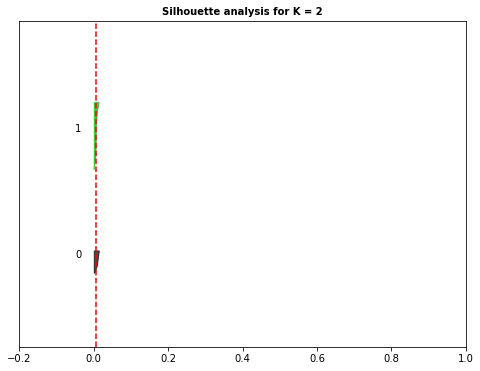

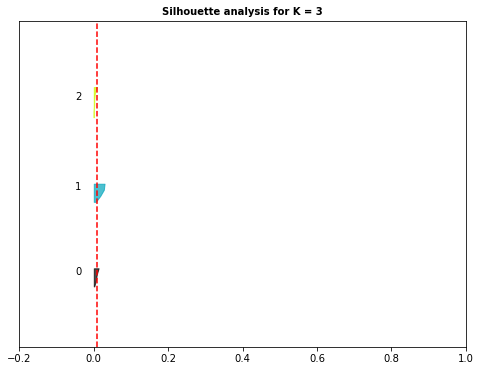

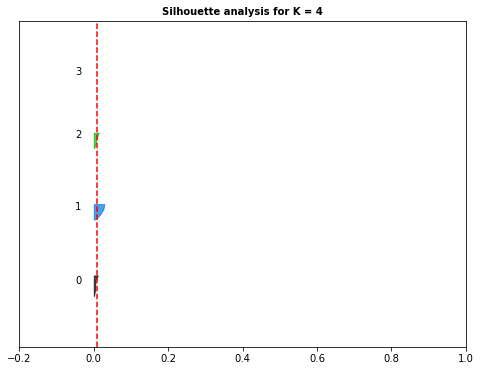

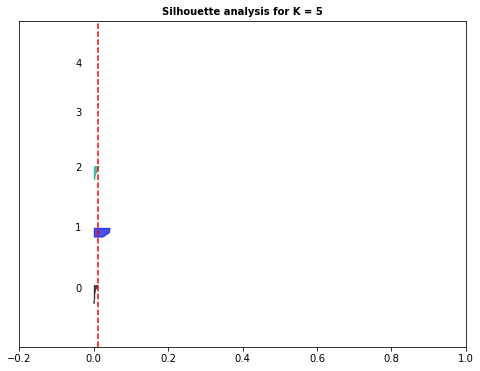

In [108]:
silhouette(kmeans_results, final_df, plot=True)

In [109]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

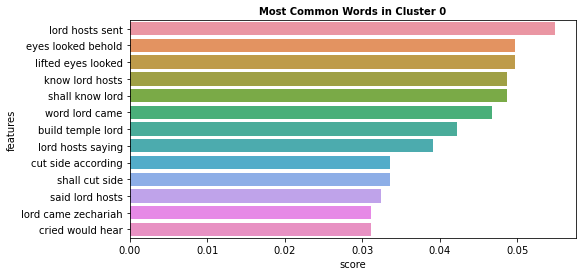

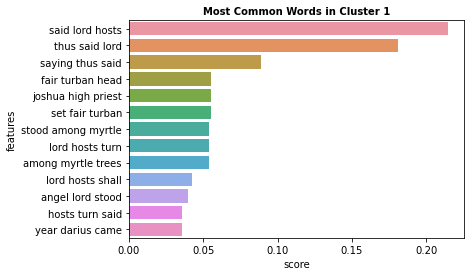

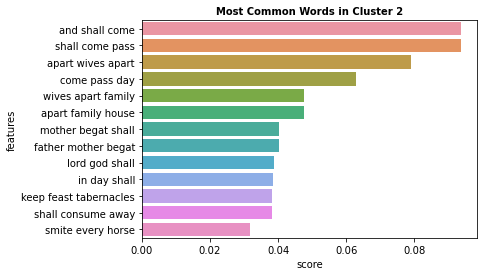

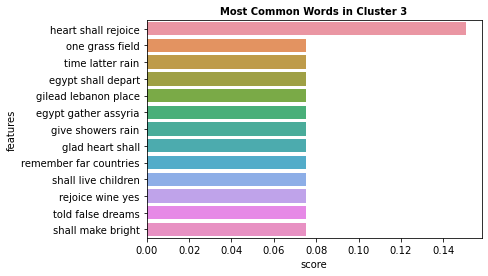

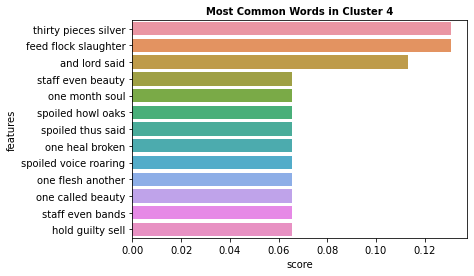

In [110]:
best_result = 5
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [111]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

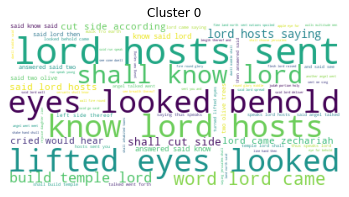

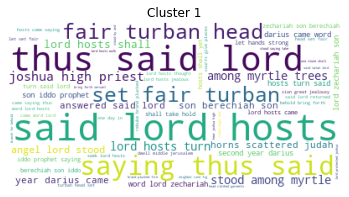

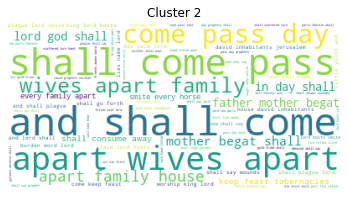

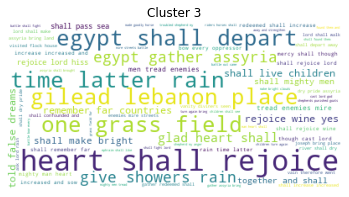

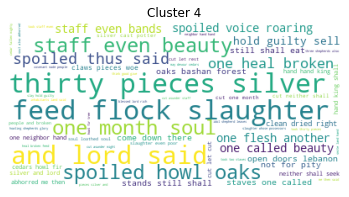

In [112]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [113]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Zacarias_1,"'eighth', 'month', ',', 'second', 'year', 'dar...",1
101,Zacarias_2,"'lifted', 'eyes', ',', 'looked', ',', 'behold'...",0
102,Zacarias_3,"'showed', 'joshua', 'high', 'priest', 'standin...",1
103,Zacarias_4,"'angel', 'talked', 'came', ',', 'waked', ',', ...",0
104,Zacarias_5,"'turned', ',', 'lifted', 'eyes', ',', 'looked'...",0


In [114]:
print(df)

           Autor                                              Livro  label
100   Zacarias_1  'eighth', 'month', ',', 'second', 'year', 'dar...      1
101   Zacarias_2  'lifted', 'eyes', ',', 'looked', ',', 'behold'...      0
102   Zacarias_3  'showed', 'joshua', 'high', 'priest', 'standin...      1
103   Zacarias_4  'angel', 'talked', 'came', ',', 'waked', ',', ...      0
104   Zacarias_5  'turned', ',', 'lifted', 'eyes', ',', 'looked'...      0
105   Zacarias_6  'turned', ',', 'lifted', 'eyes', ',', 'looked'...      0
106   Zacarias_7  'came', 'pass', 'fourth', 'year', 'king', 'dar...      0
107   Zacarias_8  'word', 'lord', 'hosts', 'came', ',', 'saying'...      1
108   Zacarias_9  'burden', 'word', 'lord', 'land', 'hadrach', '...      2
109  Zacarias_10  'ask', 'lord', 'rain', 'time', 'latter', 'rain...      3
110  Zacarias_11  'open', 'doors', ',', 'lebanon', ',', 'fire', ...      4
111  Zacarias_12  'burden', 'word', 'lord', 'israel', ',', 'said...      2
112  Zacarias_13  'day', 

Classe 1 Agrupa os capitulos que falam a respeito de acontecimentos historicos referente a Israel. 

Classe 0 Agrupa passagens relacionadas a promessas e juizos referentes a Israel. 

Classe 2 Agrupa a parte escatologica do Livro de Zacarias, referente ao periodo da grande tribulação e milenio. 

Classe 2 e 4 Agrupa os capitulos que faz alusão a ira de Deus sobre a liderança corrupta de Israel. 

Classe 0 (Zacarias 2, 4, 5, 6, 7)

Classe 1 (Zacarias 1, 3, 8) 

Classe 2 (Zacarias 9, 12, 13, 14) 

Classe 3 (Zacarias 10)

Classe 4 (Zacarias 11)

Agrupamento com 4 gurpos e trigrams. 